# BigTiger DS501 Week 1

1. [Probability](#Probability)
2. [Lending Club](#Week1-Lending-club)

# Probability
把 Probability_R_code.txt 改成用 python 寫

len(x)=10000, x=[33.95167617 28.94128932 30.50197582 ... 27.48189166 31.59824254
 31.84154569]
len(xt)=8416, xt=[28.94128932 30.50197582 29.88096915 ... 27.48189166 31.59824254
 31.84154569]
len(xtsorted)=6832, xsorted=[27.98349692 27.9840784  27.98443706 ... 31.99920196 31.99972527
 31.99983537]
Mean of xt=29.42376333936301
Mean of xsorted=29.999084493195586
Truncated mean=29.424800058121644
Truncated mean=-0.2875999709391784


/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


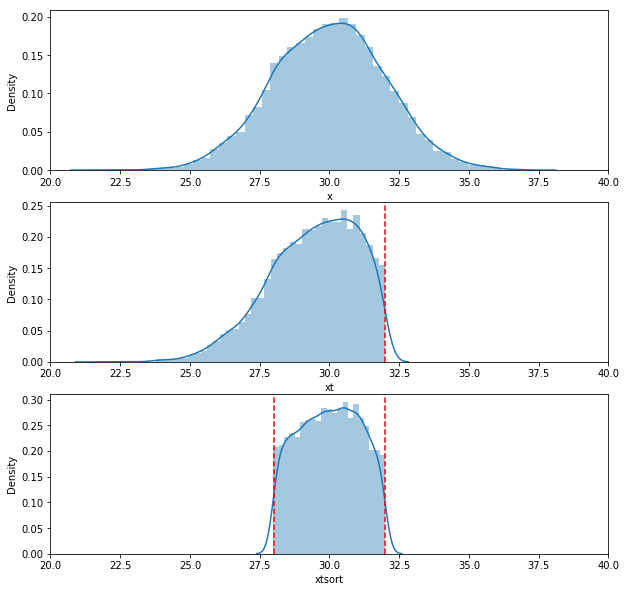

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

mu, sigma = 30, 2
a, b = 0, 32
N = 10000

x = np.random.normal(mu, sigma, N)
xt = x[x <= b]
print('len(x)={}, x={}'.format(len(x), x))
print('len(xt)={}, xt={}'.format(len(xt), xt))

xtsorted = np.sort(xt)
xtsorted = xtsorted[len(x) - len(xt):]
print('len(xtsorted)={}, xsorted={}'.format(len(xtsorted), xtsorted))

print('Mean of xt={}'.format(np.mean(xt)))
print('Mean of xsorted={}'.format(np.mean(xtsorted)))

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
ax = sns.distplot(x, norm_hist=True)
ax.set(xlabel='x', ylabel='Density', xlim=(20, 40))

plt.subplot(3,1,2)
axt = sns.distplot(xt, norm_hist=True)
axt.set(xlabel='xt', ylabel='Density', xlim=(20, 40))
axt.axvline(x=b, linestyle='--', c='r')

plt.subplot(3,1,3)
axtsort = sns.distplot(xtsorted, norm_hist=True)
axtsort.set(xlabel='xtsort', ylabel='Density', xlim=(20, 40))
axtsort.axvline(x=b, linestyle='--', c='r')
axtsort.axvline(x=mu-(b-mu), linestyle='--', c='r')

# Calculate the mean of the truncated normal distribution
alpha = (a - mu) / sigma
beta = (b - mu) / sigma

from scipy.stats import norm
Emu = mu + sigma * (norm.pdf(alpha) - norm.pdf(beta)) / (norm.cdf(beta) - norm.cdf(alpha))
print("Truncated mean={}".format(Emu))

from scipy.stats import truncnorm
print("Truncated mean={}".format(truncnorm.mean(alpha, beta)))

***
***
***

# Week1 Lending club

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

沒有 `low_memory=False` 時會出現警告

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
  
見 [https://stackoverflow.com/questions/25488675/mixed-types-when-reading-csv-files-causes-fixes-and-consequences/25488801](https://stackoverflow.com/questions/25488675/mixed-types-when-reading-csv-files-causes-fixes-and-consequences/25488801)

In [3]:
df_loan = pd.read_csv('loan.csv', low_memory=False)
df_loan_T = df_loan.copy() # 拷貝一下，如果要用到原始檔案，可以節省載入時間

檢查統計資訊，注意有沒有 outliers

In [4]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


看一下表格各個欄位的資訊

有 887379 列 x 74 欄

檢查每個欄位的型態是否有怪怪的地方

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [6]:
df_loan.shape

(887379, 74)

In [7]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

前面警告訊息說 Columns (19,55) have mixed types 看一下是哪兩個

In [9]:
print(df_loan.columns[19])
print(df_loan.columns[55])

desc
verification_status_joint


In [10]:
print(df_loan['desc'].dtype)
print(df_loan['verification_status_joint'].dtype)

object
object


想看看內容，但是看不出所以然來...

In [11]:
df_loan.loc[:,['desc', 'verification_status_joint']].head()

,desc,verification_status_joint
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,NaN
4,Borrower added on 12/21/11 > I plan on combi...,NaN


In [12]:
df_loan['id'].unique()

array([ 1077501,  1077430,  1077175, ..., 36271333, 36490806, 36271262])

In [13]:
df_loan['id'].nunique()

887379

In [14]:
len(df_loan['id'].unique()) # 會和 df_loan['id'].nunique() 結果一樣

887379

In [15]:
df_loan['member_id'].nunique()

887379

看有多少個 NaN

In [16]:
df_loan['annual_inc'].isnull().sum()

4

看是哪四個有 NaN

In [17]:
df_loan['annual_inc'][df_loan['annual_inc'].isnull()]

42449   NaN
42450   NaN
42480   NaN
42533   NaN
Name: annual_inc, dtype: float64

會比用 R 跑還要多個有空值的變數，好像是有些變數 R 根本沒讀入的關係

In [18]:
df_loan.isnull().sum().sort_values(ascending=False) # isnull() 和 isna() 是一樣的

dti_joint                      886870
verification_status_joint      886868
annual_inc_joint               886868
il_util                        868762
mths_since_rcnt_il             866569
all_util                       866007
max_bal_bc                     866007
open_rv_24m                    866007
open_rv_12m                    866007
total_cu_tl                    866007
total_bal_il                   866007
open_il_24m                    866007
open_il_12m                    866007
open_il_6m                     866007
open_acc_6m                    866007
inq_fi                         866007
inq_last_12m                   866007
desc                           761351
mths_since_last_record         750326
mths_since_last_major_derog    665676
mths_since_last_delinq         454312
next_pymnt_d                   252971
total_rev_hi_lim                70276
tot_cur_bal                     70276
tot_coll_amt                    70276
emp_title                       51462
emp_length  

算空值的數目在整個表格中佔的比例

In [19]:
df_loan.isnull().sum().sum() / (df_loan.shape[0] * df_loan.shape[1])

0.27409127085251944

把用 R 執行時，沒有出現的欄位刪掉，看看結果是否會相同

In [20]:
s1 = df_loan.isnull().sum().sort_values(ascending=False)
s1.drop(labels=['verification_status_joint', 'desc', 'next_pymnt_d', 
                'emp_title', 'emp_length', 'last_pymnt_d', 'title', 'last_credit_pull_d'], inplace=True)

In [21]:
s1.sum() / (df_loan.shape[0] * df_loan.shape[1])

0.24340050868907198

一個欄位可能有很多空值，要選出空值的數目比整個表格的列數的 0.8 倍還小的欄位

In [22]:
condition1 = df_loan.isnull().sum() <= 0.8 * df_loan.shape[0]
df_loan.loc[:, condition1].columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

把符合的欄位名字存起來

In [23]:
remain_col = df_loan.loc[:, condition1].columns

In [24]:
remain_col

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

把這些欄位抽出來，做成子表格

In [25]:
df_sub_loan = df_loan.loc[:, remain_col]
df_sub_loan.shape

(887379, 55)

missing value imputation

In [26]:
annual_inc_median = df_sub_loan['annual_inc'].median()
df_sub_loan['annual_inc'].fillna(annual_inc_median, inplace=True)

In [27]:
df_sub_loan['annual_inc'].isna().sum()

0

1.) feature 和 response 都是數值變數時

In [28]:
df_sub_loan['int_rate'].mean()

13.246739679476775

In [29]:
df_sub_loan['int_rate'].std()

4.381867414721592

In [30]:
df_sub_loan['int_rate'].median()

12.99

In [31]:
df_sub_loan['int_rate'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10     7.69
0.25     9.99
0.50    12.99
0.75    16.20
0.90    18.99
Name: int_rate, dtype: float64

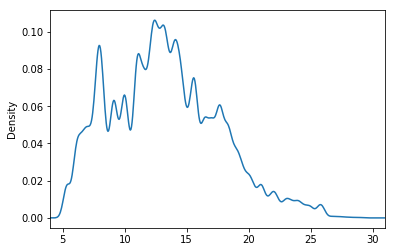

In [32]:
df_sub_loan['int_rate'].plot(kind='kde', xlim=[4, 31])

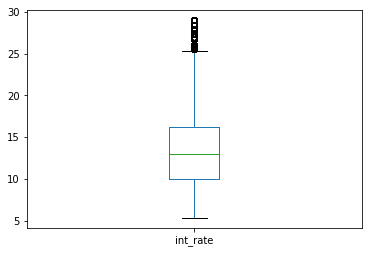

In [33]:
df_sub_loan['int_rate'].plot(kind='box')

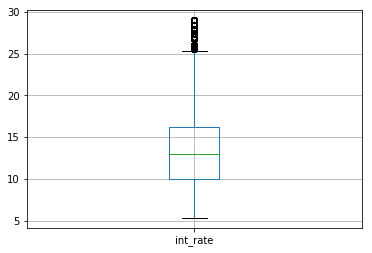

In [34]:
df_sub_loan.boxplot(['int_rate']) # boxplot() 和 plot(kind='box') 差在有沒有格線

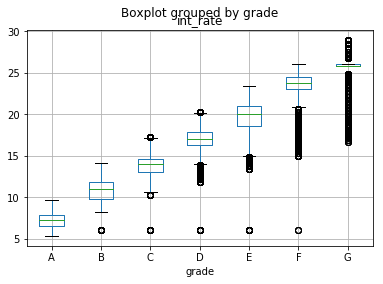

In [35]:
df_sub_loan.boxplot(column=['int_rate'], by='grade')

In [36]:
print(df_sub_loan['annual_inc'].mean())
print(df_sub_loan['annual_inc'].std())
print(df_sub_loan['annual_inc'].median())
print(df_sub_loan['annual_inc'].quantile([0.1, 0.25, 0.5, 0.75, 0.9]))

75027.54255984246
64698.157826056886
65000.0
0.10     34000.0
0.25     45000.0
0.50     65000.0
0.75     90000.0
0.90    124800.0
Name: annual_inc, dtype: float64


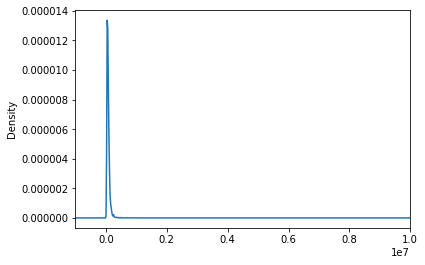

In [37]:
df_sub_loan['annual_inc'].plot(kind='kde', xlim=[-0.1e7, 1e7])

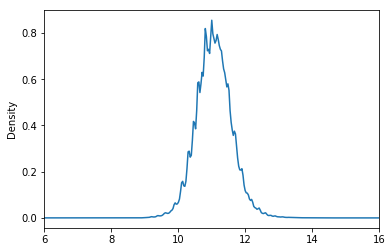

In [38]:
# np.log(df_sub_loan['annual_inc']).plot.density() # 這有 infs or NaNs ，畫圖會有問題
np.log(df_sub_loan['annual_inc'] + 1).plot(kind='kde', xlim=[6, 16]) # plot.density() 和 plot(kind='kde') 都是畫 pdf

In [39]:
df_sub_loan['annual_inc'].head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64

2.) 類別變數

In [40]:
df_sub_loan['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [41]:
df_sub_loan['loan_status'].value_counts().sort_values(ascending=True) # 從低到高排序一下

Does not meet the credit policy. Status:Charged Off       761
Default                                                  1219
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        2357
In Grace Period                                          6253
Issued                                                   8460
Late (31-120 days)                                      11591
Charged Off                                             45248
Fully Paid                                             207723
Current                                                601779
Name: loan_status, dtype: int64

算一下每個欄位佔的百分比

In [42]:
df_sub_loan['loan_status'].value_counts().sort_values(ascending=True) / df_sub_loan.shape[0] * 100

Does not meet the credit policy. Status:Charged Off     0.085758
Default                                                 0.137371
Does not meet the credit policy. Status:Fully Paid      0.224031
Late (16-30 days)                                       0.265614
In Grace Period                                         0.704659
Issued                                                  0.953369
Late (31-120 days)                                      1.306206
Charged Off                                             5.099061
Fully Paid                                             23.408600
Current                                                67.815330
Name: loan_status, dtype: float64

把百分比四捨五入到小數第二位

In [43]:
np.round(df_sub_loan['loan_status'].value_counts().sort_values(ascending=True) / df_sub_loan.shape[0] * 100, 2)

Does not meet the credit policy. Status:Charged Off     0.09
Default                                                 0.14
Does not meet the credit policy. Status:Fully Paid      0.22
Late (16-30 days)                                       0.27
In Grace Period                                         0.70
Issued                                                  0.95
Late (31-120 days)                                      1.31
Charged Off                                             5.10
Fully Paid                                             23.41
Current                                                67.82
Name: loan_status, dtype: float64

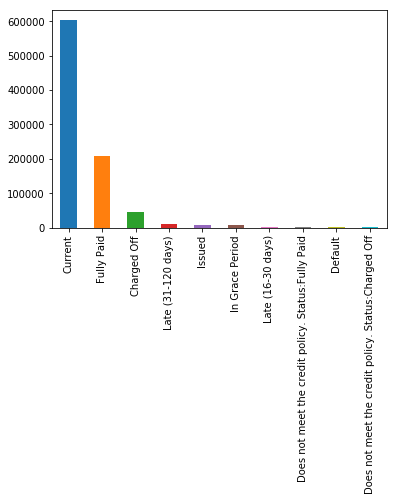

In [44]:
df_sub_loan['loan_status'].value_counts().plot(kind='bar')

In [45]:
s2 = df_sub_loan['loan_status'].str.replace('Does not meet the credit policy. Status:', '')
s2.value_counts().sort_values(ascending=True)

Default                 1219
Late (16-30 days)       2357
In Grace Period         6253
Issued                  8460
Late (31-120 days)     11591
Charged Off            46009
Fully Paid            209711
Current               601779
Name: loan_status, dtype: int64

In [46]:
def loan_status_category(x):
    x = x.replace('Does not meet the credit policy. Status:', '')
    if x in ['Current', 'Fully Paid', 'Issued']:
        return 1
    else:
        return 0

df_sub_loan['loan_status_1'] = df_sub_loan['loan_status'].apply(loan_status_category)
df_sub_loan['loan_status_1'].value_counts()

1    819950
0     67429
Name: loan_status_1, dtype: int64

In [47]:
df_sub_loan[['loan_status','loan_status_1']].head()

,loan_status,loan_status_1
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
4,Current,1


In [48]:
df_sub_loan['purpose'].value_counts().sort_values(ascending=True)

educational              423
renewable_energy         575
wedding                 2347
house                   3707
vacation                4736
moving                  5414
medical                 8540
car                     8863
small_business         10377
major_purchase         17277
other                  42894
home_improvement       51829
credit_card           206182
debt_consolidation    524215
Name: purpose, dtype: int64

In [49]:
np.round(df_sub_loan['purpose'].value_counts().sort_values(ascending=True) / df_sub_loan.shape[0] * 100, 2)

educational            0.05
renewable_energy       0.06
wedding                0.26
house                  0.42
vacation               0.53
moving                 0.61
medical                0.96
car                    1.00
small_business         1.17
major_purchase         1.95
other                  4.83
home_improvement       5.84
credit_card           23.23
debt_consolidation    59.07
Name: purpose, dtype: float64

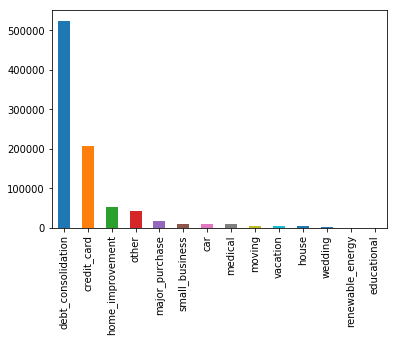

In [50]:
df_sub_loan['purpose'].value_counts().plot(kind='bar')

3.) 數值變數，數值 response

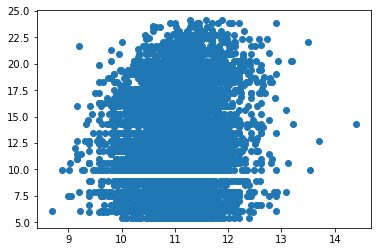

In [51]:
x = np.log(df_sub_loan.iloc[:10000]['annual_inc'] + 1)
y = df_sub_loan.iloc[:10000]['int_rate'].values
plt.scatter(x, y)

In [52]:
df_corr = df_sub_loan.iloc[:10000].loc[:, ['int_rate', 'total_acc', 'acc_now_delinq', 'annual_inc', 'dti', 'loan_amnt']]
df_corr.head()

,int_rate,total_acc,acc_now_delinq,annual_inc,dti,loan_amnt
0,10.65,9.0,0.0,24000.0,27.65,5000.0
1,15.27,4.0,0.0,30000.0,1.00,2500.0
2,15.96,10.0,0.0,12252.0,8.72,2400.0
3,13.49,37.0,0.0,49200.0,20.00,10000.0
4,12.69,38.0,0.0,80000.0,17.94,3000.0


為什麼 acc_now_delinq 都是 NaN?

In [53]:
df_corr2 = df_corr.corr()
df_corr2.head()

,int_rate,total_acc,acc_now_delinq,annual_inc,dti,loan_amnt
int_rate,1.000000,-0.009283,NaN,0.091548,0.092593,0.323269
total_acc,-0.009283,1.000000,NaN,0.319818,0.225926,0.264683
acc_now_delinq,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,0.091548,0.319818,NaN,1.000000,-0.178250,0.377407
dti,0.092593,0.225926,NaN,-0.178250,1.000000,0.034658


把 acc_now_delinq 都填 0

In [54]:
df_corr2.fillna(0)

,int_rate,total_acc,acc_now_delinq,annual_inc,dti,loan_amnt
int_rate,1.000000,-0.009283,0.0,0.091548,0.092593,0.323269
total_acc,-0.009283,1.000000,0.0,0.319818,0.225926,0.264683
acc_now_delinq,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
annual_inc,0.091548,0.319818,0.0,1.000000,-0.178250,0.377407
dti,0.092593,0.225926,0.0,-0.178250,1.000000,0.034658
loan_amnt,0.323269,0.264683,0.0,0.377407,0.034658,1.000000


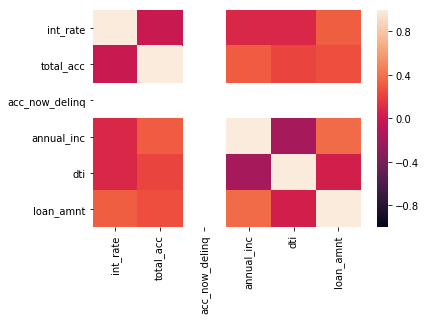

In [55]:
import seaborn as sns
sns.heatmap(df_corr2, vmin=-1, vmax=1)

4.) 類別變數，數值 response

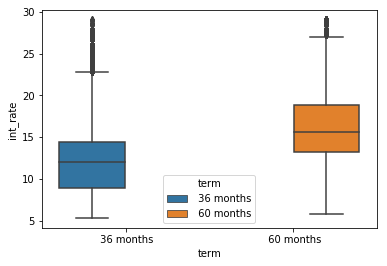

In [56]:
sns.boxplot(x='term', y='int_rate', data=df_sub_loan, hue='term')

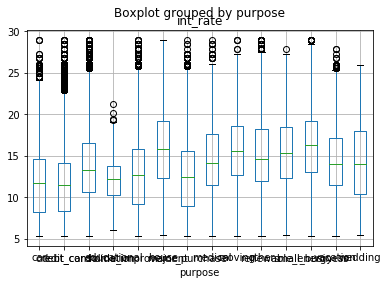

In [57]:
df_sub_loan.boxplot(column=['int_rate'], by='purpose')

In [58]:
df_sub_loan['issue_d'].head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [59]:
df_sub_loan['issue_d_1'] = pd.to_datetime(df_sub_loan['issue_d'])
df_sub_loan['issue_d_1'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d_1, dtype: datetime64[ns]

In [60]:
df_sub_loan['issue_year'] = df_sub_loan['issue_d_1'].apply(lambda x: x.year)
df_sub_loan['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: int64

In [61]:
df_sub_loan['issue_month'] = df_sub_loan['issue_d_1'].apply(lambda x: x.month)
df_sub_loan['issue_month'].head()

0    12
1    12
2    12
3    12
4    12
Name: issue_month, dtype: int64

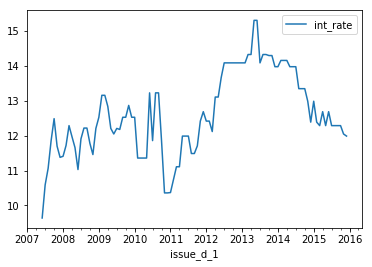

In [62]:
df_int_rate_by_time = df_sub_loan[['issue_d_1', 'int_rate']].groupby(['issue_d_1']).median()
df_int_rate_by_time.plot()

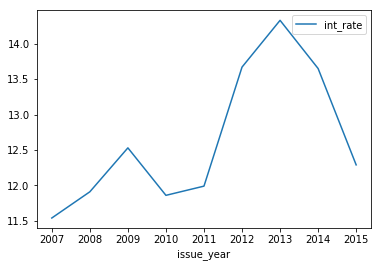

In [63]:
df_int_rate_by_year = df_sub_loan[['issue_year', 'int_rate']].groupby(['issue_year']).median()
df_int_rate_by_year.plot()

In [64]:
df_int_rate_by_year.reset_index().head()

,issue_year,int_rate
0,2007,11.54
1,2008,11.91
2,2009,12.53
3,2010,11.86
4,2011,11.99


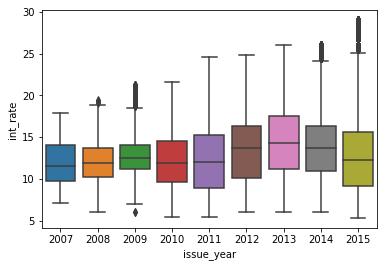

In [65]:
sns.boxplot(x='issue_year', y='int_rate', data=df_sub_loan.reset_index())

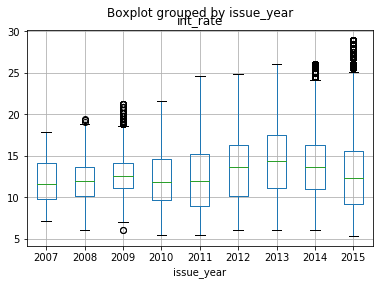

In [66]:
df_sub_loan.boxplot(column='int_rate', by='issue_year')

5.) 數值變數，類別 responese

In [67]:
df_sub_sub1 = df_sub_loan[['loan_status_1', 'annual_inc']]
df_sub_sub1.head()

,loan_status_1,annual_inc
0,1,24000.0
1,0,30000.0
2,1,12252.0
3,1,49200.0
4,1,80000.0


In [68]:
df_sub_sub1['log_annual_inc'] = df_sub_sub1['annual_inc'].apply(lambda x: np.log(x+1))

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
df_sub_sub1['log_annual_inc'].head()

0    10.085851
1    10.308986
2     9.413526
3    10.803669
4    11.289794
Name: log_annual_inc, dtype: float64

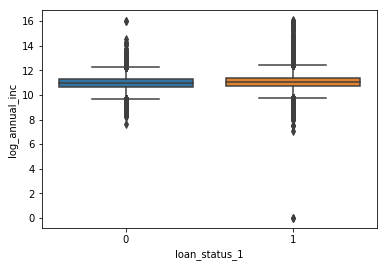

In [70]:
sns.boxplot(x='loan_status_1', y='log_annual_inc', data=df_sub_sub1)

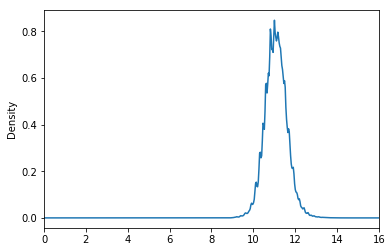

In [71]:
df_sub_sub1[df_sub_sub1['loan_status_1'] == 1]['log_annual_inc'].plot(kind='kde', xlim=[0, 16])

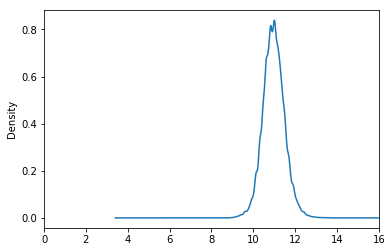

In [72]:
df_sub_sub1[df_sub_sub1['loan_status_1'] == 0]['log_annual_inc'].plot(kind='kde', xlim=[0, 16])

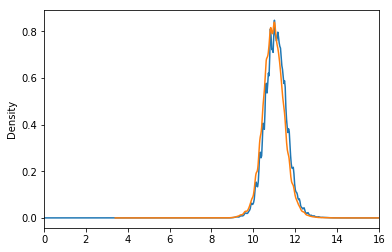

In [73]:
fig, ax = plt.subplots()
df_sub_sub1[df_sub_sub1['loan_status_1'] == 1]['log_annual_inc'].plot(kind='kde', xlim=[0, 16], ax=ax)
df_sub_sub1[df_sub_sub1['loan_status_1'] == 0]['log_annual_inc'].plot(kind='kde', xlim=[0, 16], ax=ax)

6.) 類別變數，類別 response

In [74]:
df_sub_sub2 = df_sub_loan[['loan_status_1', 'purpose']]
df_sub_sub2['count'] = 1
df_sub_sub2.head()

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,loan_status_1,purpose,count
0,1,credit_card,1
1,0,car,1
2,1,small_business,1
3,1,other,1
4,1,other,1


In [ ]:
df_sub_sub2_sum = df_sub_sub2.groupby(['loan_status_1', 'purpose']).sum()
df_sub_sub2_sum.head()
#df_sub_sub2_sum.pivot(index=['loan_status_1'], columns=['purpose'], values='count')

count
loan_status_1 purpose                  
0             car                   596
              credit_card         11755
              debt_consolidation  41608
              educational            88
              home_improvement     3553

In [ ]:
df_sub2_pivot = df_sub_sub2_sum.pivot_table(index='loan_status_1', columns='purpose', values='count')
df_sub2_pivot

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status_1,,,,,,,,,,,,,,
0,596,11755,41608,88,3553,417,1294,804,607,4163,72,1781,402,289
1,8267,194427,482607,335,48276,3290,15983,7736,4807,38731,503,8596,4334,2058


In [ ]:
s3 = df_sub_loan['loan_status_1'].value_counts()
print(s3)
print(s3[0])
print(s3[1])

1    819950
0     67429
Name: loan_status_1, dtype: int64
67429
819950


In [ ]:
df_sub2_pivot.loc[0, :] = df_sub2_pivot.loc[0, :].apply(lambda x: x / s3[0])
df_sub2_pivot.loc[1, :] = df_sub2_pivot.loc[1, :].apply(lambda x: x / s3[1])
df_sub2_pivot

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status_1,,,,,,,,,,,,,,
0,0.008839,0.174332,0.617064,0.001305,0.052692,0.006184,0.019191,0.011924,0.009002,0.061739,0.001068,0.026413,0.005962,0.004286
1,0.010082,0.237121,0.588581,0.000409,0.058877,0.004012,0.019493,0.009435,0.005863,0.047236,0.000613,0.010484,0.005286,0.002510


In [ ]:
df_sub_sub2[['loan_status_1', 'purpose']].plot(kind='bar')
plt.show()

找不到 python 中相當於 R 的 tableplot() 的東西，所以有兩個 tableplot() 沒有畫出來